In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier

In [560]:
df = pd.DataFrame()

df['feature1'] = [1,2,3,4,5,6,6,7,9,9]
df['feature2'] = [5,3,6,8,1,9,5,8,9,2]
df['target'] = [1,1,0,1,0,1,0,1,0,0]

df.shape

(10, 3)

In [561]:
df

,feature1,feature2,target
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


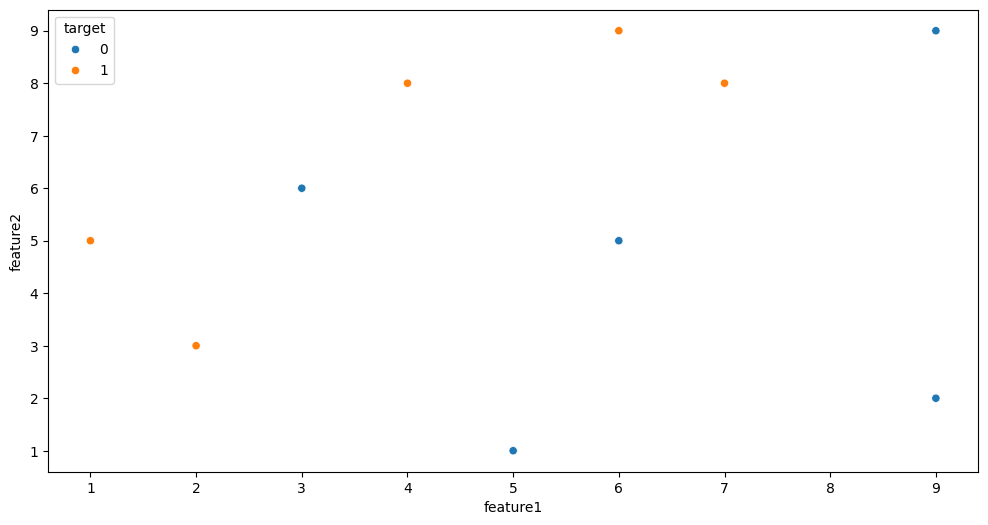

In [562]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['feature1'], y=df['feature2'], hue=df['target'])
plt.show()

In [563]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [564]:
# Step 1: Calculate the initial weights (Equal)
df['initial_weights'] = 1 / df.shape[0]
df.head(3)

,feature1,feature2,target,initial_weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1


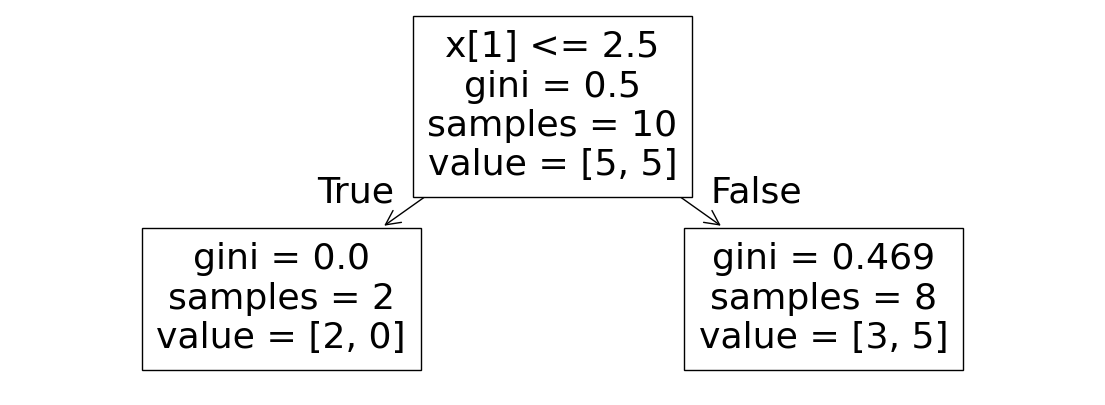

In [565]:
# Step 2: Train the first model 
dt1 = DecisionTreeClassifier(max_depth=1) # (Decision Stamp = Decision tree with max_depth = 1)

dt1.fit(X, y)

plt.figure(figsize=(14, 5))
plot_tree(dt1)
plt.show()

<Axes: >

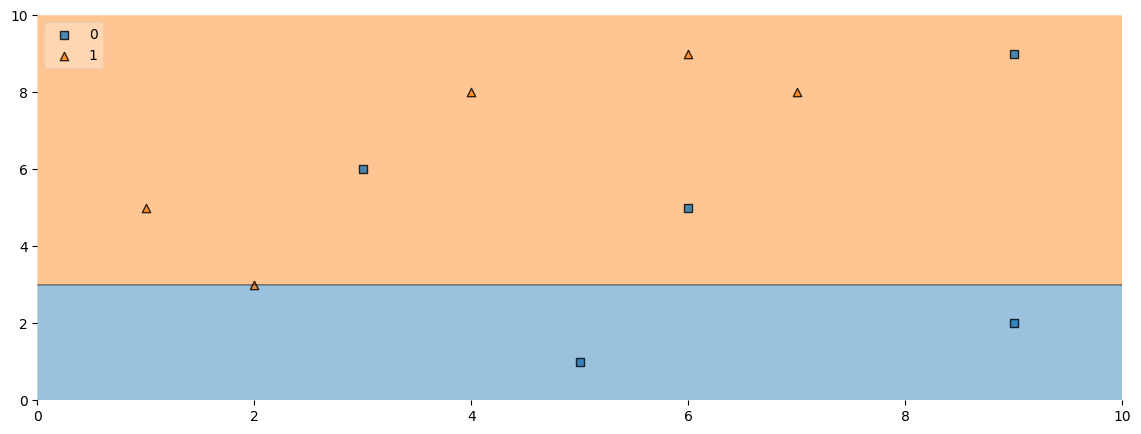

In [566]:
plt.figure(figsize=(14, 5))
plot_decision_regions(X, y, clf=dt1, legend=2)

In [567]:
# Make prediction
y_pred = dt1.predict(X)
df['y_pred'] = y_pred
df

,feature1,feature2,target,initial_weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [568]:
# Calculate the model weight
def calculate_model_weight(error):

  return (1/2)*np.log((1-error)/(error))

In [569]:
# Sum of error of misclassified point for y_pred1
0.1+0.1+0.1


0.30000000000000004

In [570]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [571]:
# Now, updated the weights
def update_row_weights(row,alpha=0.423):
  if row['target'] == row['y_pred']:
    return row['initial_weights'] * np.exp(-alpha)
  else:
    return row['initial_weights'] * np.exp(alpha)

In [572]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)
df

,feature1,feature2,target,initial_weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [573]:
# Normalize the weights so that sum = 1
print("Sum of Updated Weights:", df['updated_weights'].sum())

df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
print("After Normalization the Sum is", df['normalized_weights'].sum())

df

Sum of Updated Weights: 0.9165153319682015
After Normalization the Sum is 1.0


,feature1,feature2,target,initial_weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [574]:
# Lower and Upper range
cumsum_upper = np.cumsum(df['normalized_weights'])
cumsum_lower = cumsum_upper - df['normalized_weights']

df['range'] = list(zip(np.round(cumsum_lower, 6), np.round(cumsum_upper, 6)))
df

,feature1,feature2,target,initial_weights,y_pred,updated_weights,normalized_weights,range
0,1,5,1,0.1,1,0.065508,0.071475,"(0.0, 0.071475)"
1,2,3,1,0.1,1,0.065508,0.071475,"(0.071475, 0.14295)"
2,3,6,0,0.1,1,0.152653,0.166559,"(0.14295, 0.309508)"
3,4,8,1,0.1,1,0.065508,0.071475,"(0.309508, 0.380983)"
4,5,1,0,0.1,0,0.065508,0.071475,"(0.380983, 0.452458)"
5,6,9,1,0.1,1,0.065508,0.071475,"(0.452458, 0.523933)"
6,6,5,0,0.1,1,0.152653,0.166559,"(0.523933, 0.690492)"
7,7,8,1,0.1,1,0.065508,0.071475,"(0.690492, 0.761967)"
8,9,9,0,0.1,1,0.152653,0.166559,"(0.761967, 0.928525)"
9,9,2,0,0.1,0,0.065508,0.071475,"(0.928525, 1.0)"


In [575]:
# Creating new dataset for model 2 (Upsampling)
def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            lower, upper = row['range']
            if lower < a < upper:
                indices.append(index)
                break
    return indices

In [576]:
index_values = create_new_dataset(df)
index_values

[9, 0, 5, 1, 3, 2, 4, 3, 8, 5]

In [602]:
df2 = df.iloc[index_values, [0,1,2,3]]
df2

,feature1,feature2,target,initial_weights
5,6,9,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
4,5,1,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1


In [603]:
X = df2.iloc[:,0:2].values
y = df2.iloc[:,2].values

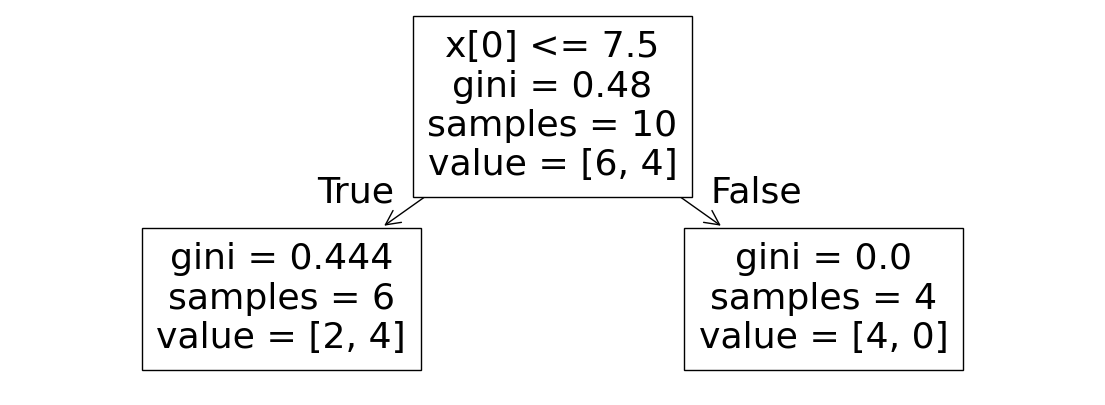

In [604]:
dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(X, y)

plt.figure(figsize=(14, 5))
plot_tree(dt2)
plt.show()

<Axes: >

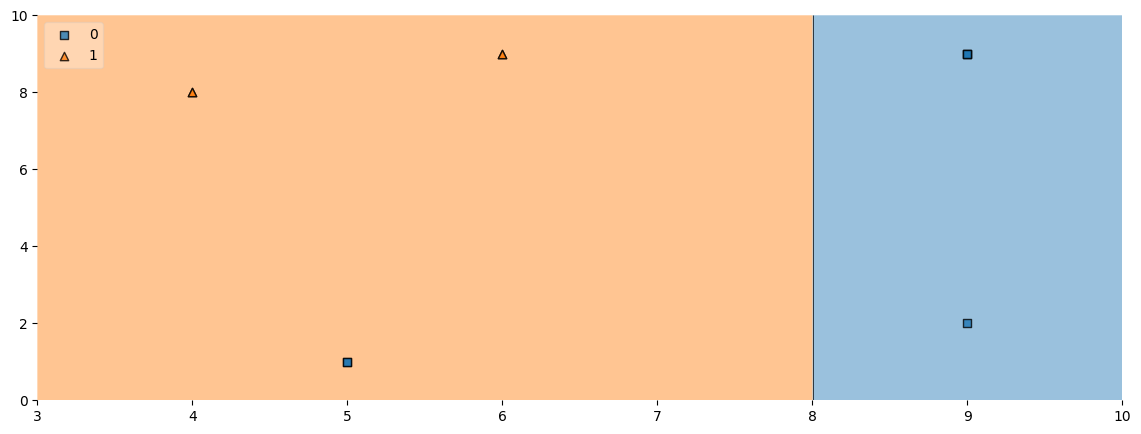

In [605]:
plt.figure(figsize=(14, 5))
plot_decision_regions(X, y, clf=dt2, legend=2)

In [606]:
df2['y_pred'] = dt2.predict(X)
df2

,feature1,feature2,target,initial_weights,y_pred
5,6,9,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,1
9,9,2,0,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,1


In [607]:
alpha2 = calculate_model_weight(0.2)
alpha2

0.6931471805599453

In [608]:
# Now, updated the weights
def update_row_weights(row,alpha=0.423):
  if row['target'] == row['y_pred']:
    return row['initial_weights'] * np.exp(-alpha)
  else:
    return row['initial_weights'] * np.exp(alpha)

In [609]:
df2['updated_weights'] = df2.apply(update_row_weights, axis=1)
df2

,feature1,feature2,target,initial_weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.065508
8,9,9,0,0.1,0,0.065508
3,4,8,1,0.1,1,0.065508
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508
8,9,9,0,0.1,0,0.065508
4,5,1,0,0.1,1,0.152653
8,9,9,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508


In [610]:
# Normalize the weights so that sum = 1
print("Sum of Updated Weights:", df2['updated_weights'].sum())

df2['normalized_weights'] = df2['updated_weights']/df2['updated_weights'].sum()
print("After Normalization the Sum is", df2['normalized_weights'].sum())

df2

Sum of Updated Weights: 0.8293697656827363
After Normalization the Sum is 1.0


,feature1,feature2,target,initial_weights,y_pred,updated_weights,normalized_weights
5,6,9,1,0.1,1,0.065508,0.078985
8,9,9,0,0.1,0,0.065508,0.078985
3,4,8,1,0.1,1,0.065508,0.078985
3,4,8,1,0.1,1,0.065508,0.078985
4,5,1,0,0.1,1,0.152653,0.184060
9,9,2,0,0.1,0,0.065508,0.078985
8,9,9,0,0.1,0,0.065508,0.078985
4,5,1,0,0.1,1,0.152653,0.184060
8,9,9,0,0.1,0,0.065508,0.078985
5,6,9,1,0.1,1,0.065508,0.078985


In [611]:
# Lower and Upper range
cumsum_upper = np.cumsum(df2['normalized_weights'])
cumsum_lower = cumsum_upper - df2['normalized_weights']

df2['range'] = list(zip(np.round(cumsum_lower, 6), np.round(cumsum_upper, 6)))
df2

,feature1,feature2,target,initial_weights,y_pred,updated_weights,normalized_weights,range
5,6,9,1,0.1,1,0.065508,0.078985,"(0.0, 0.078985)"
8,9,9,0,0.1,0,0.065508,0.078985,"(0.078985, 0.15797)"
3,4,8,1,0.1,1,0.065508,0.078985,"(0.15797, 0.236955)"
3,4,8,1,0.1,1,0.065508,0.078985,"(0.236955, 0.31594)"
4,5,1,0,0.1,1,0.152653,0.184060,"(0.31594, 0.5)"
9,9,2,0,0.1,0,0.065508,0.078985,"(0.5, 0.578985)"
8,9,9,0,0.1,0,0.065508,0.078985,"(0.578985, 0.65797)"
4,5,1,0,0.1,1,0.152653,0.184060,"(0.65797, 0.84203)"
8,9,9,0,0.1,0,0.065508,0.078985,"(0.84203, 0.921015)"
5,6,9,1,0.1,1,0.065508,0.078985,"(0.921015, 1.0)"


In [612]:
# Creating new dataset for model 3 (Upsampling)
def create_new_dataset(df2):
    indices = []

    for i in range(df2.shape[0]):
        a = np.random.random()
        for index, row in df2.iterrows():
            lower, upper = row['range']
            if lower < a < upper:
                indices.append(index)
                break
    return indices

In [613]:
index_values = create_new_dataset(df2)
index_values

[4, 3, 5, 4, 9, 4, 5, 5, 3, 8]

In [614]:
df3 = df2.iloc[index_values, [0,1,2,3]]
df3

,feature1,feature2,target,initial_weights
4,5,1,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
4,5,1,0,0.1
5,6,9,1,0.1
4,5,1,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1


In [615]:
X = df3.iloc[:,0:2].values
y = df3.iloc[:,2].values

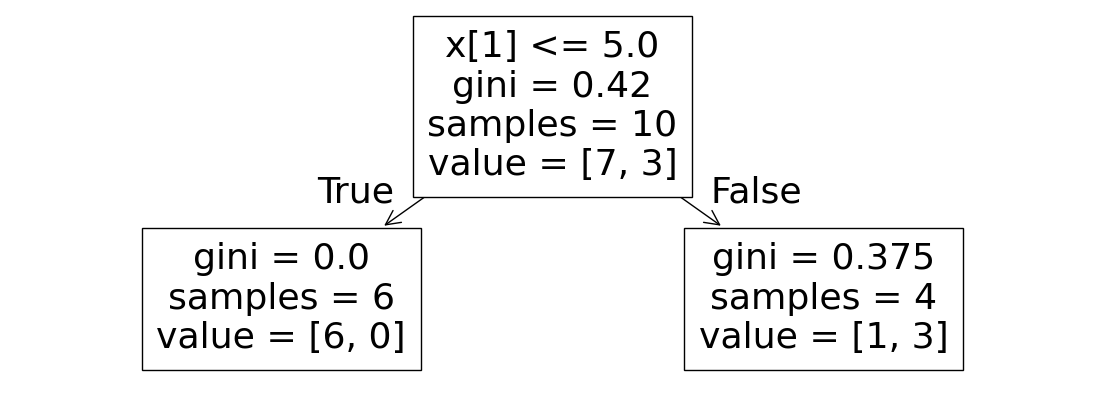

In [616]:
dt3 = DecisionTreeClassifier(max_depth=1)
dt3.fit(X, y)

plt.figure(figsize=(14, 5))
plot_tree(dt3)
plt.show()

<Axes: >

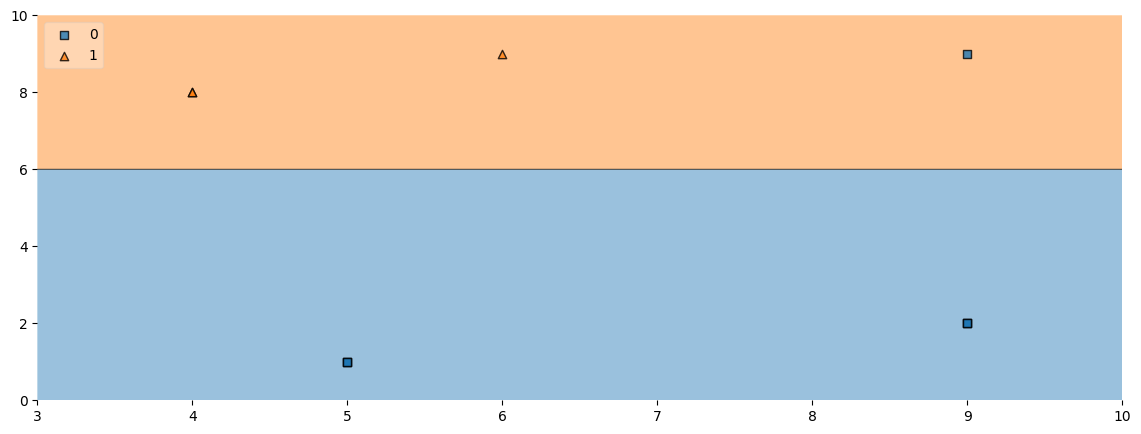

In [617]:
plt.figure(figsize=(14, 5))
plot_decision_regions(X, y, clf=dt3, legend=2)

In [618]:
df3['y_pred'] = dt3.predict(X)
df3

,feature1,feature2,target,initial_weights,y_pred
4,5,1,0,0.1,0
3,4,8,1,0.1,1
9,9,2,0,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,1
4,5,1,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,1


In [619]:
alpha3 = calculate_model_weight(0.1)
alpha3

1.0986122886681098

In [620]:
# Now, updated the weights
def update_row_weights(row,alpha=1.098):
  if row['target'] == row['y_pred']:
    return row['initial_weights'] * np.exp(-alpha)
  else:
    return row['initial_weights'] * np.exp(alpha)

In [621]:
df3['updated_weights'] = df3.apply(update_row_weights, axis=1)
df3

,feature1,feature2,target,initial_weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033354
3,4,8,1,0.1,1,0.033354
9,9,2,0,0.1,0,0.033354
4,5,1,0,0.1,0,0.033354
5,6,9,1,0.1,1,0.033354
4,5,1,0,0.1,0,0.033354
9,9,2,0,0.1,0,0.033354
9,9,2,0,0.1,0,0.033354
3,4,8,1,0.1,1,0.033354
8,9,9,0,0.1,1,0.299816


In [622]:
# Normalize the weights so that sum = 1
print("Sum of Updated Weights:", df3['updated_weights'].sum())

df3['normalized_weights'] = df3['updated_weights']/df3['updated_weights'].sum()
print("After Normalization the Sum is", df3['normalized_weights'].sum())

df3

Sum of Updated Weights: 0.6000001124692275
After Normalization the Sum is 1.0


,feature1,feature2,target,initial_weights,y_pred,updated_weights,normalized_weights
4,5,1,0,0.1,0,0.033354,0.055590
3,4,8,1,0.1,1,0.033354,0.055590
9,9,2,0,0.1,0,0.033354,0.055590
4,5,1,0,0.1,0,0.033354,0.055590
5,6,9,1,0.1,1,0.033354,0.055590
4,5,1,0,0.1,0,0.033354,0.055590
9,9,2,0,0.1,0,0.033354,0.055590
9,9,2,0,0.1,0,0.033354,0.055590
3,4,8,1,0.1,1,0.033354,0.055590
8,9,9,0,0.1,1,0.299816,0.499694


In [623]:
# Lower and Upper range
cumsum_upper = np.cumsum(df3['normalized_weights'])
cumsum_lower = cumsum_upper - df3['normalized_weights']

df3['range'] = list(zip(np.round(cumsum_lower, 6), np.round(cumsum_upper, 6)))
df3

,feature1,feature2,target,initial_weights,y_pred,updated_weights,normalized_weights,range
4,5,1,0,0.1,0,0.033354,0.055590,"(0.0, 0.05559)"
3,4,8,1,0.1,1,0.033354,0.055590,"(0.05559, 0.111179)"
9,9,2,0,0.1,0,0.033354,0.055590,"(0.111179, 0.166769)"
4,5,1,0,0.1,0,0.033354,0.055590,"(0.166769, 0.222358)"
5,6,9,1,0.1,1,0.033354,0.055590,"(0.222358, 0.277948)"
4,5,1,0,0.1,0,0.033354,0.055590,"(0.277948, 0.333537)"
9,9,2,0,0.1,0,0.033354,0.055590,"(0.333537, 0.389127)"
9,9,2,0,0.1,0,0.033354,0.055590,"(0.389127, 0.444717)"
3,4,8,1,0.1,1,0.033354,0.055590,"(0.444717, 0.500306)"
8,9,9,0,0.1,1,0.299816,0.499694,"(0.500306, 1.0)"


In [624]:
index_values = create_new_dataset(df3)
index_values

[4, 9, 8, 8, 8, 9, 4, 8, 9, 8]

In [625]:
df4 = df3.iloc[index_values, [0,1,2,3]]
df4

,feature1,feature2,target,initial_weights
5,6,9,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1


In [626]:
X = df4.iloc[:,0:2].values
y = df4.iloc[:,2].values

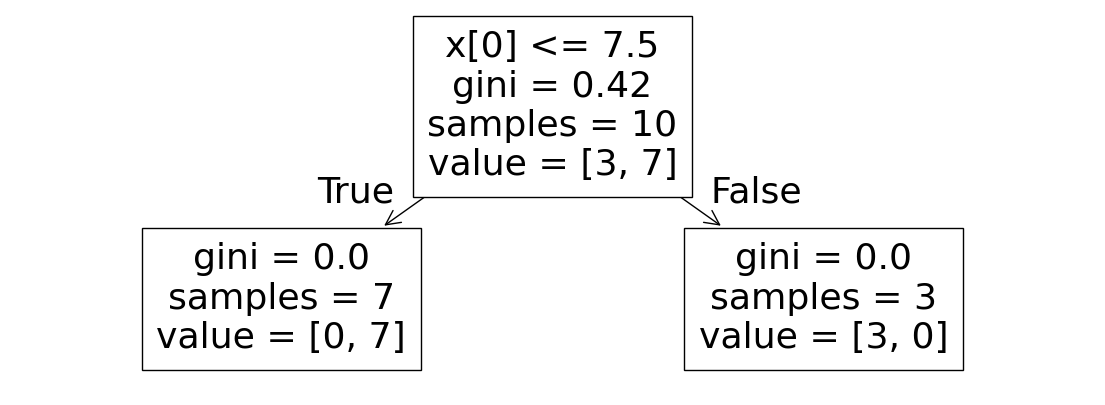

In [627]:
dt4 = DecisionTreeClassifier(max_depth=1)
dt4.fit(X, y)

plt.figure(figsize=(14, 5))
plot_tree(dt4)
plt.show()

<Axes: >

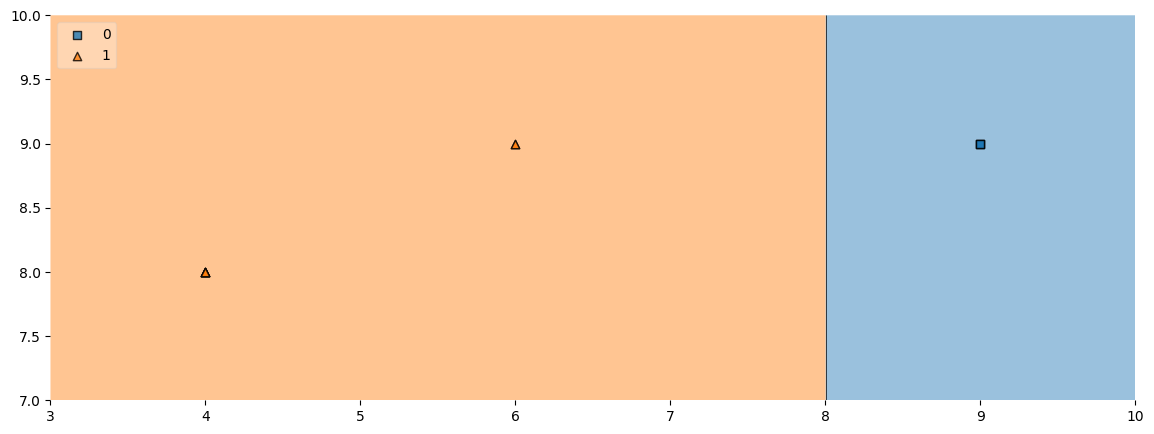

In [628]:
plt.figure(figsize=(14, 5))
plot_decision_regions(X, y, clf=dt4, legend=2)

In [629]:
df4['y_pred'] = dt4.predict(X)
df4

,feature1,feature2,target,initial_weights,y_pred
5,6,9,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1


In [631]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.6931471805599453 1.0986122886681098


## Predict for unseen Query Point

In [630]:
query = np.array([1,5]).reshape(1,2)

print(dt1.predict(query))
print(dt2.predict(query))
print(dt3.predict(query))

[1]
[1]
[0]


In [634]:
pred = alpha1*(1) + alpha2*(1) + alpha3*(0)


In [635]:
np.sign(pred)

1.0